# SO-ARM 机械臂校准和遥操作

本教程介绍如何校准 SO-ARM 机械臂，并测试主从臂的遥操作功能。

**前置条件：**
- ✅ 已完成 `00_installation_and_setup.ipynb`
- ✅ 两个机械臂已连接并识别
- ✅ 所有舵机 ID 已正确配置

**本教程内容：**
1. 校准 Follower Arm（从动臂）
2. 校准 Leader Arm（主动臂）
3. 测试遥操作功能
4. 添加摄像头支持
5. 测试完整系统

**参考：** [Seeed Studio LeRobot Wiki - 校准](https://wiki.seeedstudio.com/cn/lerobot_so100m_new/#_4)

In [ ]:
!sudo chmod 666 /dev/ttyACM*

In [15]:
print("在终端运行以下命令测试遥操作：")
print()
!sudo chmod 666 /dev/ttyACM*
!lerobot-teleoperate \
    --robot.type=so101_follower \
    --robot.port=/dev/ttyACM0 \
    --robot.id=my_awesome_follower_arm \
    --teleop.type=so101_leader \
    --teleop.port=/dev/ttyACM3 \
    --teleop.id=my_awesome_leader_arm
  
print()
print("预期行为：")
print("  - 移动 Leader Arm，Follower Arm 应该同步跟随")
print("  - 延迟应该很小（< 100ms）")
print("  - 动作应该流畅自然")
print()
print("测试要点：")
print("  1. 缓慢移动每个关节，检查跟随精度")
print("  2. 测试全范围运动")
print("  3. 测试夹爪开合")
print("  4. 检查是否有卡顿或异常")
print()
print("⚠️ 按 Ctrl+C 可以随时停止遥操作")

在终端运行以下命令测试遥操作：

INFO 2025-11-11 22:35:01 eoperate.py:187 {'display_data': False,
 'fps': 60,
 'robot': {'calibration_dir': None,
           'cameras': {},
           'disable_torque_on_disconnect': True,
           'id': 'my_awesome_follower_arm',
           'max_relative_target': None,
           'port': '/dev/ttyACM0',
           'use_degrees': False},
 'teleop': {'calibration_dir': None,
            'id': 'my_awesome_leader_arm',
            'port': '/dev/ttyACM3',
            'use_degrees': False},
 'teleop_time_s': None}
INFO 2025-11-11 22:35:01 01_leader.py:82 my_awesome_leader_arm SO101Leader connected.
INFO 2025-11-11 22:35:01 follower.py:104 my_awesome_follower_arm SO101Follower connected.

time: 16.73ms (60 Hz)

time: 16.73ms (60 Hz)

time: 16.73ms (60 Hz)

time: 16.73ms (60 Hz)

time: 16.73ms (60 Hz)

time: 16.73ms (60 Hz)

time: 16.73ms (60 Hz)

time: 16.73ms (60 Hz)

time: 16.73ms (60 Hz)

time: 16.73ms (60 Hz)

time: 16.73ms (60 Hz)

time: 16.73ms (60 Hz)

time: 16.73ms 

In [4]:
!ls -l /dev/ttyACM*

crw-rw-rw- 1 root dialout 166, 0 11月 12 06:16 /dev/ttyACM0
crw-rw-rw- 1 root dialout 166, 1 11月 12 05:52 /dev/ttyACM1
crw-rw-rw- 1 root dialout 166, 2 11月 12 05:52 /dev/ttyACM2


## 查看机械臂端口号，移除从动臂

In [5]:
!ls -l /dev/ttyACM*

crw-rw-rw- 1 root dialout 166, 1 11月 12 05:52 /dev/ttyACM1
crw-rw-rw- 1 root dialout 166, 2 11月 12 05:52 /dev/ttyACM2


## 移除主动臂

In [6]:
!ls -l /dev/ttyACM*

crw-rw---- 1 root dialout 166, 0 11月 12 06:19 /dev/ttyACM0
crw-rw-rw- 1 root dialout 166, 2 11月 12 05:52 /dev/ttyACM2


## 恢复

In [7]:
!ls -l /dev/ttyACM*

crw-rw---- 1 root dialout 166, 0 11月 12 06:19 /dev/ttyACM0
crw-rw---- 1 root dialout 166, 1 11月 12 06:19 /dev/ttyACM1
crw-rw-rw- 1 root dialout 166, 2 11月 12 05:52 /dev/ttyACM2


In [ ]:
!sudo chmod 666 /dev/ttyACM*
!sudo chmod 666 /dev/video*
#设备名对应video序号
!v4l2-ctl --list-devices
#摄像头拍摄图像
!lerobot-find-cameras opencv    

Intel(R) RealSense(TM) Depth Ca (usb-0000:06:00.3-3):
	/dev/video0
	/dev/video1
	/dev/video2
	/dev/video3
	/dev/video4
	/dev/video5
	/dev/media0

Wed Camera: Wed Camera (usb-0000:0b:00.3-2.2):
	/dev/video6
	/dev/video7
	/dev/media1

罗技高清网络摄像机 C93 (usb-0000:0b:00.3-2.3):
	/dev/video8
	/dev/video9
	/dev/media2

Wed Camera: Wed Camera (usb-0000:0b:00.3-2.4):
	/dev/video10
	/dev/video11
	/dev/media3


--- Detected Cameras ---
Camera #0:
  Name: OpenCV Camera @ /dev/video10
  Type: OpenCV
  Id: /dev/video10
  Backend api: V4L2
  Default stream profile:
    Format: 0.0
    Fourcc: YUYV
    Width: 640
    Height: 480
    Fps: 30.0
--------------------
Camera #1:
  Name: OpenCV Camera @ /dev/video2
  Type: OpenCV
  Id: /dev/video2
  Backend api: V4L2
  Default stream profile:
    Format: 0.0
    Fourcc: UYVY
    Width: 640
    Height: 480
    Fps: 30.0
--------------------
Camera #2:
  Name: OpenCV Camera @ /dev/video4
  Type: OpenCV
  Id: /dev/video4
  Backend api: V4L2
  Default stream profi

## 插拔后需要重新给权限

In [8]:
!sudo chmod 666 /dev/ttyACM*

## 存储命名需要每次更改

In [ ]:
lerobot-record \
    --robot.type=so101_follower \
    --robot.port=/dev/ttyACM0 \
    --robot.id=my_awesome_follower_arm \
    --robot.cameras="{ top: {type: opencv, index_or_path: 10, width: 640, height: 480, fps: 30, fourcc: "MJPG"},front: {type: opencv, index_or_path: 8, width: 640, height: 480, fps: 30, fourcc: "MJPG"}, wrist: {type: opencv, index_or_path: 6, width: 640, height: 480, fps: 30, fourcc: "MJPG"}}" \
    --teleop.type=so101_leader \
    --teleop.port=/dev/ttyACM1 \
    --teleop.id=my_awesome_leader_arm \
    --display_data=true \
    --dataset.num_episodes=50 \
    --dataset.single_task="Grab the red cup" \
    --dataset.push_to_hub=false \
    --dataset.episode_time_s=15 \
    --dataset.reset_time_s=5 \
    --dataset.repo_id=wzy04/so101_grab_cup02

## 回放数据集

In [ ]:
# 查看第0个episode
!lerobot-dataset-viz --repo-id wzy04/so101_grab_cup1 --episode-index 0

# 查看第1个episode
!lerobot-dataset-viz --repo-id wzy04/so101_multi_tasks --episode-index 51

In [32]:
!lerobot-dataset-viz --repo-id wzy04/so101_multi_tasks --episode-index 51

[2025-11-13T06:58:33Z INFO  re_grpc_server] Listening for gRPC connections on 0.0.0.0:9876. Connect by running `rerun --connect rerun+http://127.0.0.1:9876/proxy`
Error: winit EventLoopError: os error at /usr/local/cargo/registry/src/index.crates.io-1949cf8c6b5b557f/winit-0.30.12/src/platform_impl/linux/mod.rs:765: neither WAYLAND_DISPLAY nor WAYLAND_SOCKET nor DISPLAY is set.
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.60it/s]
[2025-11-13T06:58:46Z ERROR re_sdk::recording_stream] Failed to flush previous sink: gRPC has been unable to connect to rerun+http://127.0.0.1:9876/proxy for 12s
[2025-11-13T06:58:47Z ERROR re_grpc_client::write] Failed to flush gRPC messages during shutdown: gRPC has been unable to connect to rerun+http://127.0.0.1:9876/proxy for 13s


In [41]:
# ===== Cell 1: 加载数据 =====
from pathlib import Path
import json
import pandas as pd
import pyarrow.parquet as pq

dataset_name = "so101_multi_tasks"  # 可改成其他数据集
local_dir = Path.home() / f".cache/huggingface/lerobot/wzy04/{dataset_name}"

# 读取info.json
with open(local_dir / "meta/info.json") as f:
    info = json.load(f)

# 读取所有parquet文件
parquet_files = sorted((local_dir / "data/chunk-000").glob("*.parquet"))
dfs = []
for f in parquet_files:
    table = pq.read_table(f)
    dfs.append(table.to_pandas())

df = pd.concat(dfs, ignore_index=True)

print(f"数据集: {dataset_name}")
print(f"FPS: {info['fps']}")
print(f"总帧数: {len(df)}")
print(f"总episodes: {df['episode_index'].max() + 1}")
print(f"相机: {[k for k in info['features'].keys() if 'image' in k]}")

数据集: so101_multi_tasks
FPS: 30
总帧数: 21624
总episodes: 72
相机: ['observation.images.top', 'observation.images.front', 'observation.images.wrist']


In [42]:
# ===== Cell 2: 统计所有episodes =====
episode_stats = df.groupby('episode_index').size()

print(f"Episode统计 (共{len(episode_stats)}个):")
print(f"{'Episode':<10} {'帧数':<10} {'时长(秒)':<10}")
print("-" * 30)
for ep_idx in range(min(20, len(episode_stats))):  # 显示前20个
    count = episode_stats[ep_idx]
    print(f"{ep_idx:<10} {count:<10} {count/info['fps']:<10.1f}")

Episode统计 (共72个):
Episode    帧数         时长(秒)     
------------------------------
0          300        10.0      
1          301        10.0      
2          301        10.0      
3          300        10.0      
4          300        10.0      
5          300        10.0      
6          301        10.0      
7          300        10.0      
8          300        10.0      
9          300        10.0      
10         301        10.0      
11         300        10.0      
12         301        10.0      
13         301        10.0      
14         300        10.0      
15         301        10.0      
16         301        10.0      
17         301        10.0      
18         300        10.0      
19         300        10.0      


In [43]:
# ===== Cell 3: 查看指定episode =====
episode_idx = 5  # 改成你想看的episode

ep_data = df[df['episode_index'] == episode_idx]
print(f"Episode {episode_idx}:")
print(f"  帧数: {len(ep_data)}")
print(f"  时长: {len(ep_data)/info['fps']:.1f} 秒")
print(f"  任务索引: {ep_data['task_index'].iloc[0]}")

print(f"\n状态和动作范围:")
states = ep_data['observation.state'].apply(lambda x: x if isinstance(x, list) else x.tolist())
actions = ep_data['action'].apply(lambda x: x if isinstance(x, list) else x.tolist())

import numpy as np
states_array = np.array(states.tolist())
actions_array = np.array(actions.tolist())

print(f"  状态: min={states_array.min(axis=0)}, max={states_array.max(axis=0)}")
print(f"  动作: min={actions_array.min(axis=0)}, max={actions_array.max(axis=0)}")

Episode 5:
  帧数: 300
  时长: 10.0 秒
  任务索引: 0

状态和动作范围:
  状态: min=[-10.62569427 -98.06884766 -21.05263138  56.01912308 -10.95424843
   0.84566599], max=[16.25323868 -7.8925271  99.09255981 99.5654068  -1.12418306 17.61804008]
  动作: min=[-10.96045208 -99.3899765  -23.60791588  54.84444427 -11.1519289
   0.        ], max=[ 16.53483963  -8.14814854  98.06718445 100.          -0.86591446
  17.95491219]


/tmp/ipykernel_47209/432619539.py:22: UserWarning: Glyph 24103 (\N{CJK UNIFIED IDEOGRAPH-5E27}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47209/432619539.py:22: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47209/432619539.py:22: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47209/432619539.py:22: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47209/432619539.py:22: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47209/432619539.py:22: UserWarning: Glyph 29366 (\N{CJK UNIFIED IDEOGRAPH-72B6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_47209/432619539.py:22: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}

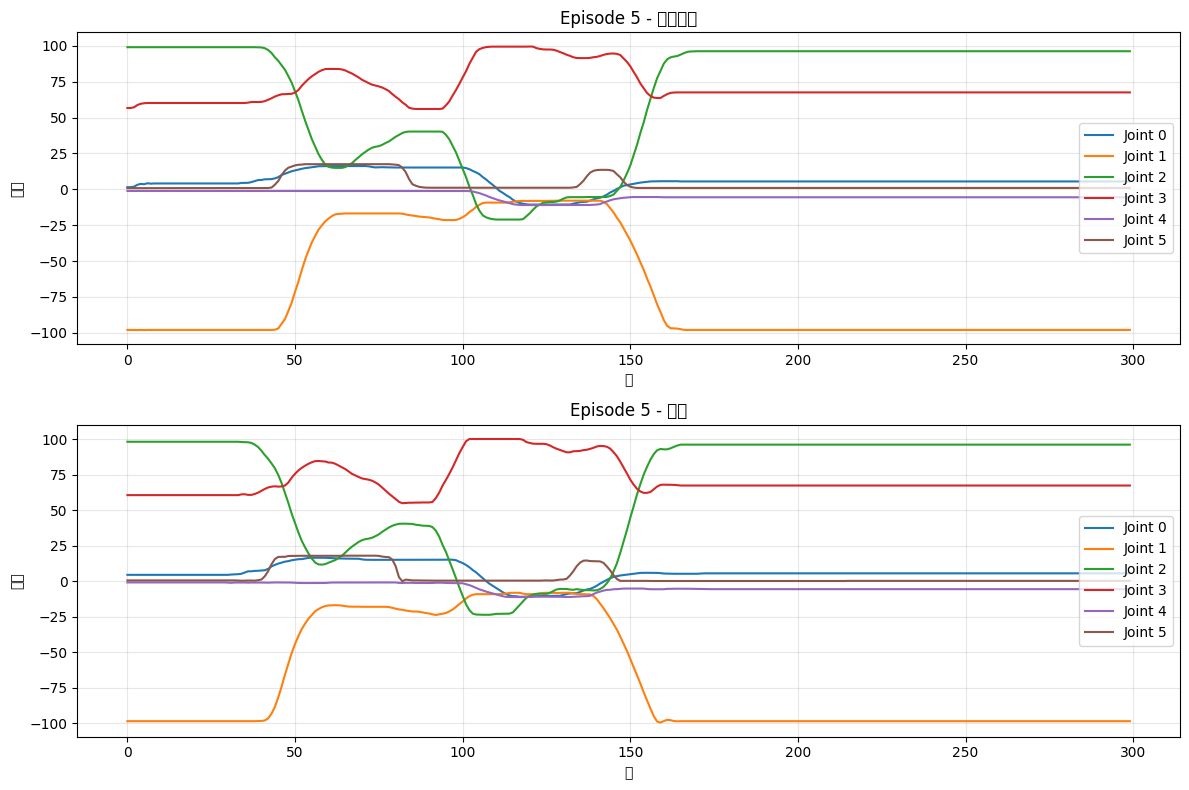

In [44]:
# ===== Cell 4: 显示episode的时间序列 =====
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 状态曲线
axes[0].plot(states_array)
axes[0].set_title(f'Episode {episode_idx} - 关节状态')
axes[0].set_xlabel('帧')
axes[0].set_ylabel('角度')
axes[0].legend([f'Joint {i}' for i in range(states_array.shape[1])], loc='right')
axes[0].grid(True, alpha=0.3)

# 动作曲线
axes[1].plot(actions_array)
axes[1].set_title(f'Episode {episode_idx} - 动作')
axes[1].set_xlabel('帧')
axes[1].set_ylabel('角度')
axes[1].legend([f'Joint {i}' for i in range(actions_array.shape[1])], loc='right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [45]:
# ===== Cell 5: 任务分布统计 =====
task_stats = df.groupby(['task_index', 'episode_index']).size().reset_index(name='frames')
task_summary = task_stats.groupby('task_index').agg({
    'episode_index': 'count',
    'frames': 'sum'
}).rename(columns={'episode_index': 'num_episodes', 'frames': 'total_frames'})

print("任务统计:")
print(task_summary)
print(f"\n每个任务的episodes:")
for task_idx in task_summary.index:
    eps = task_stats[task_stats['task_index'] == task_idx]['episode_index'].tolist()
    print(f"  任务{task_idx}: {len(eps)} 个episodes - {eps[:10]}..." if len(eps) > 10 else f"  任务{task_idx}: {eps}")

任务统计:
            num_episodes  total_frames
task_index                            
0                     52         15619
1                     20          6005

每个任务的episodes:
  任务0: 52 个episodes - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...
  任务1: 20 个episodes - [52, 53, 54, 55, 56, 57, 58, 59, 60, 61]...


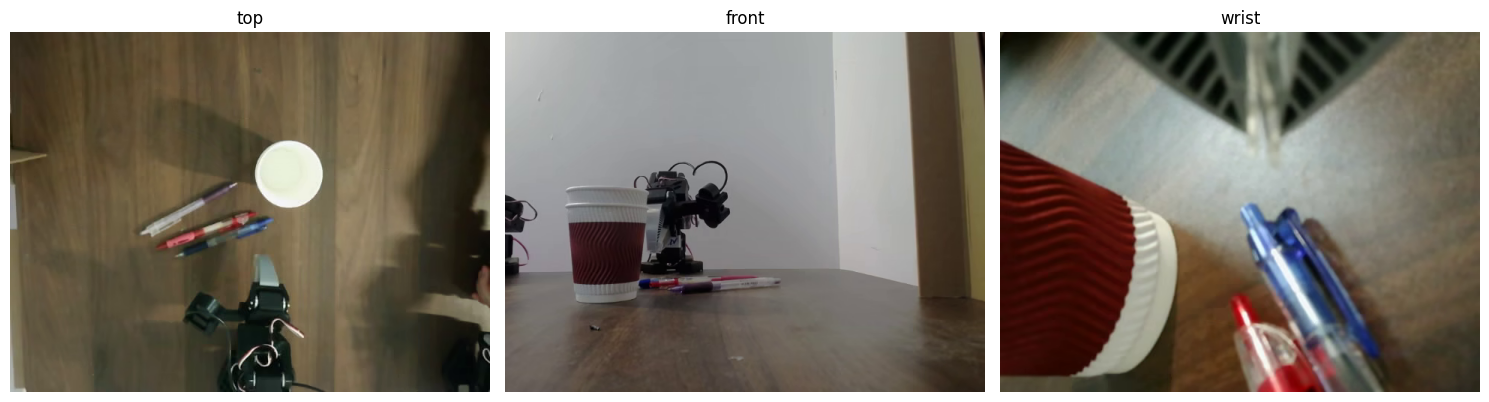

In [49]:
# ===== Cell 6: 使用LeRobotDataset查看图像 =====
from lerobot.datasets.lerobot_dataset import LeRobotDataset
import matplotlib.pyplot as plt
import numpy as np

# 需要联网或设置离线模式
dataset = LeRobotDataset(f"wzy04/{dataset_name}")

# 获取episode 5的第一帧
ep5_first_idx = df[df['episode_index'] == 52].index[0]
frame = dataset[ep5_first_idx]

image_keys = [k for k in frame.keys() if 'image' in k]
fig, axes = plt.subplots(1, len(image_keys), figsize=(15, 5))
if len(image_keys) == 1:
    axes = [axes]

for i, key in enumerate(image_keys):
    img = frame[key].numpy()
    if img.shape[0] == 3:  # CHW -> HWC
        img = np.transpose(img, (1, 2, 0))
    axes[i].imshow(img)
    axes[i].set_title(key.split('.')[-1])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 13、回放到实体从臂演示

In [11]:
!lerobot-replay \
    --robot.type=so101_follower \
    --robot.port=/dev/ttyACM0 \
    --robot.id=my_awesome_follower_arm \
    --dataset.repo_id=wzy04/so101_grab_cup1 \
    --dataset.episode=3

INFO 2025-11-12 06:57:51 ot_replay.py:95 {'dataset': {'episode': 3,
             'fps': 30,
             'repo_id': 'wzy04/so101_grab_cup1',
             'root': None},
 'play_sounds': True,
 'robot': {'calibration_dir': None,
           'cameras': {},
           'disable_torque_on_disconnect': True,
           'id': 'my_awesome_follower_arm',
           'max_relative_target': None,
           'port': '/dev/ttyACM0',
           'use_degrees': False}}
INFO 2025-11-12 06:57:51 follower.py:104 my_awesome_follower_arm SO101Follower connected.
INFO 2025-11-12 06:57:51 ls/utils.py:227 Replaying episode
INFO 2025-11-12 06:58:02 follower.py:230 my_awesome_follower_arm SO101Follower disconnected.


In [14]:
# 查看数据集目录
!ls -lh /home/wzy/.cache/huggingface/lerobot/wzy04/

总计 16K
drwxrwxr-x 5 wzy wzy 4.0K 11月 12 06:46 so101_grab_cup
drwxrwxr-x 5 wzy wzy 4.0K 11月 12 07:03 so101_grab_cup01
drwxrwxr-x 5 wzy wzy 4.0K 11月 12 07:10 so101_grab_cup02
drwxrwxr-x 5 wzy wzy 4.0K 11月 12 06:49 so101_grab_cup1


In [ ]:
# 继续录制39个episodes（总共达到50个）
lerobot-record \
    --robot.type=so101_follower \
    --robot.port=/dev/ttyACM0 \
    --robot.id=my_awesome_follower_arm \
    --robot.cameras="{ top: {type: opencv, index_or_path: 10, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"},front: {type: opencv, index_or_path: 8, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}, wrist: {type: opencv, index_or_path: 6, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}}" \
    --teleop.type=so101_leader \
    --teleop.port=/dev/ttyACM1 \
    --teleop.id=my_awesome_leader_arm \
    --display_data=true \
    --dataset.num_episodes=39 \
    --dataset.single_task="Grab the red cup" \
    --dataset.push_to_hub=false \
    --dataset.episode_time_s=15 \
    --dataset.reset_time_s=5 \
    --dataset.repo_id=wzy04/so101_grab_cup02 \
    --resume=true

In [ ]:
第1步：录制任务1 - 杯子堆叠（50个episodes）
lerobot-record \
    --robot.type=so101_follower \
    --robot.port=/dev/ttyACM0 \
    --robot.id=my_awesome_follower_arm \
    --robot.cameras="{ top: {type: opencv, index_or_path: 10, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"},front: {type: opencv, index_or_path: 8, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}, wrist: {type: opencv, index_or_path: 6, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}}" \
    --teleop.type=so101_leader \
    --teleop.port=/dev/ttyACM1 \
    --teleop.id=my_awesome_leader_arm \
    --display_data=true \
    --dataset.num_episodes=50 \
    --dataset.single_task="Stack the red cup on another cup" \
    --dataset.push_to_hub=false \
    --dataset.episode_time_s=15 \
    --dataset.reset_time_s=5 \
    --dataset.repo_id=wzy04/so101_multi_tasks
    
lerobot-record \
    --robot.type=so101_follower \
    --robot.port=/dev/ttyACM0 \
    --robot.id=my_awesome_follower_arm \
    --robot.cameras="{ top: {type: opencv, index_or_path: 10, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"},front: {type: opencv, index_or_path: 8, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}, wrist: {type: opencv, index_or_path: 6, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}}" \
    --teleop.type=so101_leader \
    --teleop.port=/dev/ttyACM1 \
    --teleop.id=my_awesome_leader_arm \
    --display_data=true \
    --dataset.num_episodes=20 \
    --dataset.single_task="Stack the red cup on another cup" \
    --dataset.push_to_hub=false \
    --dataset.episode_time_s=15 \
    --dataset.reset_time_s=5 \
    --dataset.repo_id=wzy04/so101_multi_tasks \
    --resume=true
    
    第2步：继续录制任务2 - 笔放进杯子（50个episodes）
lerobot-record \
    --robot.type=so101_follower \
    --robot.port=/dev/ttyACM0 \
    --robot.id=my_awesome_follower_arm \
    --robot.cameras="{ top: {type: opencv, index_or_path: 10, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"},front: {type: opencv, index_or_path: 8, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}, wrist: {type: opencv, index_or_path: 6, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}}" \
    --teleop.type=so101_leader \
    --teleop.port=/dev/ttyACM1 \
    --teleop.id=my_awesome_leader_arm \
    --display_data=true \
    --dataset.num_episodes=10 \
    --dataset.single_task="Put the red pen into the cup" \
    --dataset.push_to_hub=false \
    --dataset.episode_time_s=15 \
    --dataset.reset_time_s=5 \
    --dataset.repo_id=wzy04/so101_multi_tasks \
    --resume=true

In [ ]:
# 1. 登录wandb（如果启用）
!wandb login

/home/wzy/envs/lerobot/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/wzy/envs/lerobot/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type

In [18]:
# 2. 检查数据集
!lerobot-dataset-viz --repo-id wzy04/so101_grab_cup02 --episode-index 0


100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.43it/s]


In [19]:
# 3. 确认GPU可用
!python -c "import torch; print(torch.cuda.is_available())"


True


# 单任务训练

In [24]:
!lerobot-train \
  --policy.path=lerobot/smolvla_base \
  --dataset.repo_id=wzy04/so101_grab_cup02 \
  --rename_map='{"observation.images.front": "observation.images.camera1", "observation.images.top": "observation.images.camera2", "observation.images.wrist": "observation.images.camera3"}' \
  --batch_size=8 \
  --steps=2000 \
  --output_dir=outputs/train/so101_grab_cup \
  --job_name=so101_grab_cup_training \
  --policy.device=cuda \
  --policy.push_to_hub=false \
  --wandb.enable=false

INFO 2025-11-12 21:06:19 ot_train.py:163 {'batch_size': 8,
 'checkpoint_path': None,
 'dataset': {'episodes': None,
             'image_transforms': {'enable': False,
                                  'max_num_transforms': 3,
                                  'random_order': False,
                                  'tfs': {'affine': {'kwargs': {'degrees': [-5.0,
                                                                            5.0],
                                                                'translate': [0.05,
                                                                              0.05]},
                                                     'type': 'RandomAffine',
                                                     'weight': 1.0},
                                          'brightness': {'kwargs': {'brightness': [0.8,
                                                                                   1.2]},
                                                         't

## 多任务测试，最终训练脚本


In [ ]:
!lerobot-train \
  --policy.path=lerobot/smolvla_base \
  --dataset.repo_id=wzy04/so101_multi_tasks \
  --rename_map='{"observation.images.front": "observation.images.camera1", "observation.images.top": "observation.images.camera2", "observation.images.wrist": "observation.images.camera3"}' \
  --batch_size=32 \
  --steps=20000 \
  --output_dir=outputs/train/smolvla_so101 \
  --job_name=smolvla_so101_training \
  --policy.device=cuda \
  --policy.push_to_hub=true \
  --wandb.enable=true \
  --policy.use_amp=true \
  --num_workers=12


INFO 2025-11-13 13:44:00 ot_train.py:163 {'batch_size': 32,
 'checkpoint_path': None,
 'dataset': {'episodes': None,
             'image_transforms': {'enable': False,
                                  'max_num_transforms': 3,
                                  'random_order': False,
                                  'tfs': {'affine': {'kwargs': {'degrees': [-5.0,
                                                                            5.0],
                                                                'translate': [0.05,
                                                                              0.05]},
                                                     'type': 'RandomAffine',
                                                     'weight': 1.0},
                                          'brightness': {'kwargs': {'brightness': [0.8,
                                                                                   1.2]},
                                                         '

In [ ]:
!lerobot-train \
  --policy.path=lerobot/smolvla_base \
  --dataset.repo_id=wzy04/so101_multi_tasks \
  --rename_map='{"observation.images.front": "observation.images.camera1", "observation.images.top": "observation.images.camera2", "observation.images.wrist": "observation.images.camera3"}' \
  --batch_size=32 \
  --steps=20000 \
  --output_dir=outputs/train/so101_multi_tasks \
  --job_name=so101_multi_tasks_training \
  --policy.device=cuda \
  --policy.push_to_hub=false \
  --wandb.enable=false \
  --policy.use_amp=true \
  --num_workers=12


usage: lerobot-train [-h] [--config_path str] [--dataset str]
                     [--dataset.repo_id str] [--dataset.root str]
                     [--dataset.episodes str] [--image_transforms str]
                     [--dataset.image_transforms.enable str]
                     [--dataset.image_transforms.max_num_transforms str]
                     [--dataset.image_transforms.random_order str]
                     [--dataset.image_transforms.tfs str]
                     [--dataset.revision str]
                     [--dataset.use_imagenet_stats str]
                     [--dataset.video_backend str] [--dataset.streaming str]
                     [--env str]
                     [--env.type {aloha,pusht,gym_manipulator,libero,metaworld}]
                     [--env.visualization_width str]
                     [--env.visualization_height str] [--robot str]
                     [--env.robot.type str] [--teleop str]
                     [--env.teleop.type str] [--processor str]
      

测试

In [ ]:
# 验证任务1（杯子堆叠）
lerobot-record \
    --robot.type=so101_follower \
    --robot.port=/dev/ttyACM0 \
    --robot.id=my_awesome_follower_arm \
    --robot.cameras="{ top: {type: opencv, index_or_path: 10, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"},front: {type: opencv, index_or_path: 8, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}, wrist: {type: opencv, index_or_path: 6, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}}" \
    --policy.path=./lerobot/outputs/train/so101_multi_tasks/checkpoints/last/pretrained_model \
    --task="Stack the red cup on another cup" \
    --dataset.episode_time_s=50 \
    --num_episodes=10

# 验证任务2（笔放进杯子）
lerobot-control \
    --robot.type=so101_follower \
    --robot.port=/dev/ttyACM0 \
    --robot.id=my_awesome_follower_arm \
    --robot.cameras="{ top: {type: opencv, index_or_path: 10, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"},front: {type: opencv, index_or_path: 8, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}, wrist: {type: opencv, index_or_path: 6, width: 640, height: 480, fps: 30, fourcc: \"MJPG\"}}" \
    --policy.path=./lerobot/outputs/train/so101_multi_tasks/checkpoints/last/pretrained_model \
    --task="Put the red pen into the cup" \
    --num_episodes=10